## IMPORTS:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import accuracy_score,confusion_matrix, plot_confusion_matrix
import string
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Datasets creation and processing

In [3]:
fake=pd.read_csv('/content/drive/MyDrive/Fake_News/Fake.csv')
fake['type']=[0]*len(fake)
true=pd.read_csv('/content/drive/MyDrive/Fake_News/True.csv')
true['type']=[1]*len(true)

fake=fake.drop(['title','subject','date'],axis=1)
true=true.drop(['title','subject','date'],axis=1)

# replacing the null values with empty string
fake= fake.fillna('')
true= true.fillna('')

news=pd.concat([fake,true],axis=0)
news=news.sample(frac=1)

news.reset_index(inplace=True)
news=news.drop('index',axis=1)
news.head()

,text,type
0,VATICAN CITY (Reuters) - Pope Francis will mee...,1
1,"Thomas Piketty, the French economist who start...",0
2,After eight years of belly aching from every s...,0
3,You just can t make this stuff up Yet another ...,0
4,Being sent to Russia for misbehavior may be ju...,0


<function matplotlib.pyplot.show(*args, **kw)>

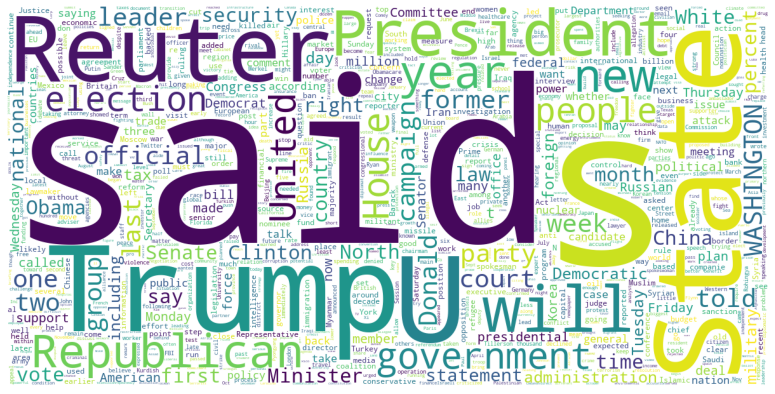

In [ ]:
from wordcloud import WordCloud
text = " ".join(i for i in true.text)

wc = WordCloud(background_color = "white", width = 1200, height = 600,
               contour_width = 0, contour_color = "red", max_words = 1000,
               scale = 1, collocations = False, repeat = True, min_font_size = 1)
wc.generate(text)
plt.figure(figsize = [15, 7])
plt.imshow(wc)
plt.axis("off")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

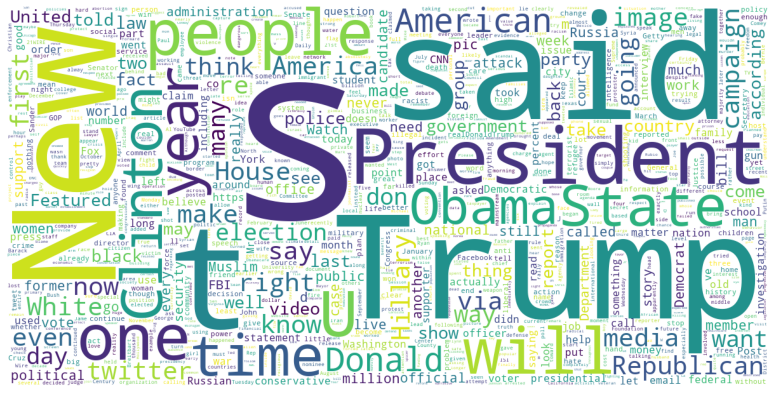

In [ ]:
text = " ".join(i for i in fake.text)

wc = WordCloud(background_color = "white", width = 1200, height = 600,
               contour_width = 0, contour_color = "red", max_words = 1000,
               scale = 1, collocations = False, repeat = True, min_font_size = 1)
wc.generate(text)
plt.figure(figsize = [15, 7])
plt.imshow(wc)
plt.axis("off")
plt.show

In [ ]:
news.duplicated().sum()
news.drop_duplicates(inplace = True)
news.duplicated().sum()

0

In [ ]:
stop_word = stopwords.words('english')
def process(x):
    #lower the value
    x =x.lower()
    #converting in ascii value
    x = x.encode('ascii' , 'ignore').decode()
    #removing all the stopword
    x = ' '.join([word for word in x.split(' ') if word not in stop_word])
    #remove mentions
    x = re.sub('@\S+' , ' ' , x)
    #remove url
    x = re.sub('https*\S+' , ' ' , x)
    #remove hastag
    x= re.sub('#\S+' , ' ' , x)
    #remove ticks and next character
    x = re.sub("\'\w+" , ' ' , x)
    #remove number
    x = re.sub(r'\w+\d+\w*' ,'  ' , x)
    #remove the over spaces
    x = re.sub('\s{2,}' , '' , x)

    words = []
    for i in x:
        if i not in string.punctuation:
            words.append(i)
    return ''.join(words) 

In [ ]:
port_stem = PorterStemmer()
def stemming(content):
    stemmed_content = [port_stem.stem(word) for word in word_tokenize(content)]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [4]:
import pickle
def pickling (pickle_name,obj):
  save_obj=open('/content/drive/MyDrive/Fake_News/pickles/'+pickle_name+".pickle","wb")
  print(pickle_name)
  pickle.dump(obj,save_obj)
  save_obj.close()
def depickling(pickle_name):
  f=open('/content/drive/MyDrive/Fake_News/pickles/'+pickle_name+'.pickle',"rb")
  obj=pickle.load(f)
  f.close()
  return obj

In [ ]:
x=news['text']
x=x.apply(process)
x=x.apply(stemming)
y=news['type']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.1,shuffle=True)

In [7]:
xtrain=depickling("xtrain")
xtest=depickling("xtest")

## vectorizing:

In [ ]:
vectorize = TfidfVectorizer()
xv_train = vectorize.fit_transform(xtrain)
xv_test = vectorize.transform(xtest)

In [6]:
pickling("x",x)
pickling("xtrain",xtrain)
pickling("ytrain",ytrain)
pickling("xtest",xtest)
pickling("ytest",ytest)

NameError: ignored

## Models:

In [ ]:
model_dict={}

In [8]:
from warnings import filterwarnings

f=open('/content/drive/MyDrive/Fake_News/pickles/xtrainVec.pickle',"rb")
xv_train=pickle.load(f)
f.close()

f=open('/content/drive/MyDrive/Fake_News/pickles/ytrain.pickle',"rb")
ytrain=pickle.load(f)
f.close()

f=open('/content/drive/MyDrive/Fake_News/pickles/xtestVec.pickle',"rb")
xv_test=pickle.load(f)
f.close()

f=open('/content/drive/MyDrive/Fake_News/pickles/ytest.pickle',"rb")
ytest=pickle.load(f)
f.close()

def train_and_eval(classifier,name):
  print(name)
  print()
  classifier.fit(xv_train,ytrain)
  ypred=classifier.predict(xv_test)
  print("Accuracy of ",name," model = ", 100*accuracy_score(ypred,ytest), "%")
  model_dict[name]=accuracy_score(ypred,ytest)
  plt.figure(figsize = (4, 4))
  filterwarnings('ignore')
  plot_confusion_matrix(classifier, xv_test, ytest, cmap = 'Blues')
  print()

FileNotFoundError: ignored

In [ ]:
classifiers=[LogisticRegression(),MultinomialNB(),BernoulliNB(),SGDClassifier(),SVC(),LinearSVC(),NuSVC(),RandomForestClassifier(),KNeighborsClassifier(),MLPClassifier(),AdaBoostClassifier()]
names=["LogiReg","MNB","BNB","SGDC","SVC","LinSVC","nuSVC","forest","knn","mlp","ada"]

In [ ]:
for i in range (0,len(names)):
  train_and_eval(classifiers[i],names[i])

LogiReg

Accuracy of  LogiReg  model =  98.05950840879689 %

MNB

Accuracy of  MNB  model =  91.28072445019406 %

BNB

Accuracy of  BNB  model =  94.82535575679172 %

SGDC

Accuracy of  SGDC  model =  98.68046571798189 %

SVC

